In [1]:
# pip install --upgrade scikit-learn

## Importing bank dataset

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv('bank.csv', delimiter=';')

In [4]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


## Understanding the dataset

In [5]:
data['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [6]:
data['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [7]:
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
print(data.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


## Encoding

In [11]:
# Define columns for One-Hot Encoding and Label Encoding
one_hot_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']
label_column = 'y'
columns_to_drop = ['poutcome', 'contact','month']

In [12]:
#Drop the specified columns first
data = data.drop(columns=columns_to_drop)

# Separate the label column
labels = data[label_column]
features = data.drop(columns=[label_column])

In [13]:
# Identify numeric columns
numeric_columns = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = features.select_dtypes(include=['object']).columns.tolist()


# Remove one_hot_columns from categorical_columns to avoid redundancy
categorical_columns = [col for col in categorical_columns if col not in one_hot_columns]

## column transformer

In [14]:
# Set up OneHotEncoder for categorical features
onehot_encoder = OneHotEncoder(drop='first')


# Create a ColumnTransformer for one-hot encoding
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, one_hot_columns)
    ],
    remainder='passthrough'
)

### Fit and transform the features

In [15]:
encoded_features = column_transformer.fit_transform(features)

# Encode the label column separately
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [16]:
# Get the column names for the one-hot encoded columns and numeric columns
onehot_encoded_columns = column_transformer.named_transformers_['onehot'].get_feature_names_out(one_hot_columns)
all_columns = list(onehot_encoded_columns) + numeric_columns + categorical_columns

# Combine the encoded features and labels into a single DataFrame
encoded_data = pd.DataFrame(encoded_features, columns=all_columns)
encoded_data[label_column] = encoded_labels

# Print the encoded DataFrame
print("Data after dropping columns and encoding:")
print(encoded_data.head())

Data after dropping columns and encoding:
   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0              0.0               0.0            0.0             0.0   
1              0.0               0.0            0.0             0.0   
2              0.0               0.0            0.0             1.0   
3              0.0               0.0            0.0             1.0   
4              1.0               0.0            0.0             0.0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0          0.0                0.0           0.0          0.0             0.0   
1          0.0                0.0           1.0          0.0             0.0   
2          0.0                0.0           0.0          0.0             0.0   
3          0.0                0.0           0.0          0.0             0.0   
4          0.0                0.0           0.0          0.0             0.0   

   job_unemployed  ...  housing_yes  loan_yes   ag

## Train test split

In [17]:
# Separate features and target variable
X = encoded_data.drop(columns=[label_column])
y = encoded_data[label_column]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Decision Tree Classifier

In [18]:
# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluate the Model

In [21]:
# Predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8530386740331491


# Classification report

In [20]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       807
           1       0.34      0.37      0.35        98

    accuracy                           0.85       905
   macro avg       0.63      0.64      0.63       905
weighted avg       0.86      0.85      0.86       905



## Hyperparameter Tuning

In [24]:
# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

## Train the Decision Tree Classifier

In [25]:
# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Grid search cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

C:\Users\shrut\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
139 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrut\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrut\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\shrut\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\shrut\anaconda3\lib\site-packag

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

## Using best parameter

In [26]:
# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


## Predictions on the test set with the best estimator

In [27]:
y_pred = best_clf.predict(X_test)

# Calculate accuracy with the best estimator
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after hyperparameter tuning:", accuracy)

Accuracy after hyperparameter tuning: 0.881767955801105


## Classification report

In [28]:
print("Classification Report after hyperparameter tuning:")
print(classification_report(y_test, y_pred))

Classification Report after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       807
           1       0.40      0.19      0.26        98

    accuracy                           0.88       905
   macro avg       0.66      0.58      0.60       905
weighted avg       0.85      0.88      0.86       905



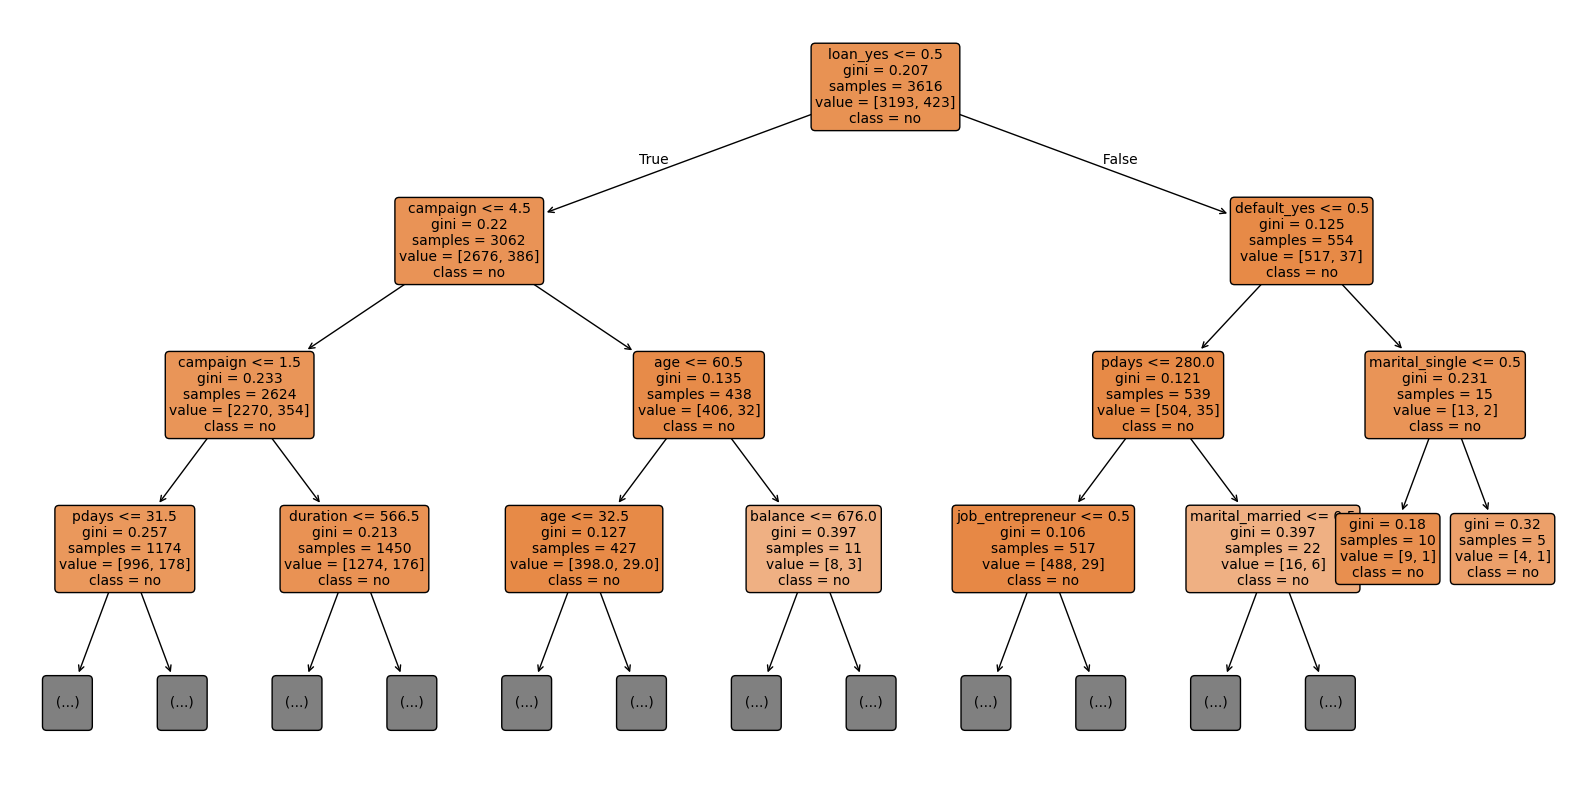

In [38]:

plt.figure(figsize=(20, 10))
plot_tree(best_clf, 
          feature_names=all_columns, 
          class_names=['no', 'yes'],  # Adjust based on your actual class labels
          filled=True, 
          rounded=True, 
          fontsize=10,
          max_depth=3)  # Change this value to adjust depth
plt.savefig("limited_depth_tree.png", format='png', bbox_inches='tight')
plt.show()